In [915]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [916]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?',
    'Time Encoding',
    'Approx Error "Size" (for figures only)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

# drop nan time encoding
approximation_algorithms = approximation_algorithms[approximation_algorithms['Time Encoding'].notnull()]


# remove question marks from time encoding
approximation_algorithms['Time Encoding'] = approximation_algorithms['Time Encoding'].str.replace('?', '')
approximation_algorithms['Time Encoding'].value_counts()



Time Encoding
10        80
20        46
400       32
11        26
21        19
16         9
15         9
16.24      8
500        8
25         8
15.015     8
25.02      6
30         6
40         5
15.41      3
16.1       3
26.5       2
31         2
6          2
12         2
12.1       2
600        2
16.5       1
1010       1
60         1
984        1
15.019     1
26.65      1
22         1
25.5       1
13         1
16.2       1
6.1        1
16.4       1
1045       1
6.6        1
15.26      1
15.25      1
25.51      1
25.2       1
26.55      1
21.5       1
25.3       1
27         1
15.097     1
41         1
Name: count, dtype: int64

In [917]:
# read sheet1
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?',
    'Time Encoding',

]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']
sheet1 = sheet1[sheet1['Approximate?'] != 1]


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(
    r'(\d+\.?\d*)')[0].astype(float)


sheet1['Approx Error "Size" (for figures only)'] = '0'

# drop if Famiy Name is not in approximation_algorithms
sheet1 = sheet1[sheet1['Family Name'].isin(
    approximation_algorithms['Family Name'])]

# drop NaN time encoding
sheet1 = sheet1[sheet1['Time Encoding'].notnull()]

sheet1['Time Encoding'].value_counts()


Time Encoding
20         38
11         29
16         19
10         10
986         7
1000        6
30          6
1045        5
10.1        4
15.25       3
1010        3
26.5        2
15.109      2
16.1        2
1020        2
2000        2
21          2
12          2
15.992      1
15.097      1
15.614      1
15.41       1
9000        1
1984        1
15.92       1
960         1
11.585      1
11.1        1
944         1
9122        1
1515        1
40          1
52          1
28.5        1
10.0005     1
15.105      1
11.3        1
16.2        1
15.5        1
15.47       1
15.26       1
15.24       1
15.23       1
15.107      1
15.103      1
15.101      1
988.1       1
15.4        1
988.2       1
15.95       1
16.9        1
942         1
41.1        1
Name: count, dtype: int64

In [918]:
# convert time encoding into a function name following this example: 10 -> comp_fn_10_0000 , 10.5 -> comp_fn_10_5000
def encode_time_to_function_name(time_str):
    # Split on the decimal point
    parts = time_str.split('.')
    integer_part = int(parts[0])
    decimal_part = 0
    if len(parts) > 1:
        decimal_fraction = parts[1] + "0000" 
        decimal_part = int(decimal_fraction[:4])  

    function_name = f"comp_fn_{integer_part:d}_{decimal_part:04d}"
    return function_name

sheet1['Time Encoding Function'] = sheet1['Time Encoding'].apply(encode_time_to_function_name)
approximation_algorithms['Time Encoding Function'] = approximation_algorithms['Time Encoding'].apply(encode_time_to_function_name)

In [919]:
encode_time_to_function_name('6.6')

'comp_fn_6_6000'

In [920]:
import inspect
from complexity_functions import complexity_functions

elements = inspect.getmembers(complexity_functions, inspect.isfunction)
elements_dict = dict(elements)

# check if all time encoding functions are in the complexity_functions module
for time_encoding in sheet1['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(sheet1[sheet1['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


for time_encoding in approximation_algorithms['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(approximation_algorithms[approximation_algorithms['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


In [921]:
sheet1['n = 10^3'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
sheet1['n = 10^6'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
sheet1['n = 10^9'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))

approximation_algorithms['n = 10^3'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
approximation_algorithms['n = 10^6'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
approximation_algorithms['n = 10^9'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))



In [922]:
# list families that are in both datasets
sheet1_families = sheet1['Family Name'].unique()
approximation_families = approximation_algorithms['Family Name'].unique()

common_families = np.intersect1d(sheet1_families, approximation_families)
len(common_families)

approximation_algorithms['Approx Error "Size" (for figures only)'].value_counts()


Approx Error "Size" (for figures only)
1.0    151
2.0     69
4.0     37
2.4     31
2.6     24
Name: count, dtype: int64

In [923]:
# list families that are in approxmaiton_families but not in sheet1_families
missing_families = np.setdiff1d(approximation_families, sheet1_families)
missing_families

array(['Convex Optimization (Non-linear)', 'Root Computation',
       'Wiener Index'], dtype=object)

In [924]:
approximation_families

array(['Sorting', 'Matrix Chain Multiplication', 'Maximum Flow',
       'Matrix Product', 'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'All-Pairs Shortest Paths (APSP)',
       'LU Decomposition', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Convex Optimization (Non-linear)',
       'Optimal Binary Search Trees', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Eigenvalues (Iterative Methods)', 'Root Computation',
       'Nearest Neighbor Search', 'Cardinality Estimation',
       'The Traveling-Salesman Problem', 'The Subset-Sum Problem',
       'The Vertex Cover Problem', 'The Set-Covering Problem',
       'Link Analysis', 'Maximum Cut', 'Wiener Index',
       'Determinant of Matrices with Integer Entries'], dtype=object)

In [925]:
sheet1_families

array(['Optimal Binary Search Trees', 'The Subset-Sum Problem', 'Sorting',
       'Matrix Chain Multiplication', 'Maximum Flow', 'Matrix Product',
       'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'LU Decomposition',
       'Nearest Neighbor Search', 'The Traveling-Salesman Problem',
       'All-Pairs Shortest Paths (APSP)',
       'Eigenvalues (Iterative Methods)', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Cardinality Estimation', 'The Vertex Cover Problem',
       'The Set-Covering Problem', 'Link Analysis', 'Maximum Cut',
       'Determinant of Matrices with Integer Entries'], dtype=object)

In [926]:
# APSP
# TRaveling salesman problem
# Set cover problems 


# For each family have 3 lines (Any, Constant, Exact)

# log scale
# log log scale
approximation_algorithms[approximation_algorithms['Family Name'] == 'All-Pairs Shortest Paths (APSP)'].sort_values(by=['n = 10^9'])

,Family Name,Looked at?,Relevant?,Variation,Algorithm Name,Year,Time Complexity Class,Time Encoding,"Approx Error ""Size"" (for figures only)",Approximation Factor Class (Mult),Approximation Factor Class (Add),Approximation Type (additive/multiplicative),Parametrized Approximation?,Type of PTAS (if PTAS),Parallel?,Quantum?,Time Encoding Function,n = 10^3,n = 10^6,n = 10^9
185,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Chechik, Zhang [Theorem 1.3]",2022.0,5.01,20,4.0,3.01,1.99,multiplicative-additive,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
150,All-Pairs Shortest Paths (APSP),1,1,"APSP, weighted, undirected, no FMM (Approximate)","Baswana, Goyal, Sen",2009.0,5.33,20,2.4,3.00,2.00,multiplicative-additive,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
184,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Chechik, Zhang [Theorem 1.2]",2022.0,5.01,20,2.4,3.00,1.99,multiplicative-additive,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
183,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Chechik, Zhang [Theorem 1.1]",2022.0,5.01,20,2.4,3.00,2.00,multiplicative-additive,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
182,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Akav, Roditty",2020.0,5.01,20,2.4,3.01,2.00,multiplicative-additive,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
180,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Baswana, Gaur, Sen, Upadhyay [Theorem 5]",2008.0,5.00,20,2.6,4.50,2.00,multiplicative-additive,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
179,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Baswana, Gaur, Sen, Upadhyay [Theorem 4]",2008.0,5.00,20,2.4,4.00,2.00,multiplicative-additive,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
178,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, unweighted, undir...","Patrascu, Roditty",2010.0,5.66,20,2.4,3.00,2.00,multiplicative-additive,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
177,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, weighted, undirec...","Dory, Forster, Kirkpatrick, Nazari, V. William...",2023.0,5.66,20,2.0,3.00,99999.00,multiplicative,no,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
176,All-Pairs Shortest Paths (APSP),2,1,"Approximate Distance Oracle, weighted, undirec...",Chechik,2015.0,5.50,20,2.6,4.50,99999.00,multiplicative,yes,NaN,0,0.0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000


In [927]:
sheet1[sheet1['Family Name'] == 'All-Pairs Shortest Paths (APSP)'].sort_values(by=['n = 10^9'])

,Family Name,Looked at?,Variation,Algorithm Name,Year,Time Complexity Class,Time Encoding,Approximate?,Parallel?,Quantum?,"Approx Error ""Size"" (for figures only)",Time Encoding Function,n = 10^3,n = 10^6,n = 10^9
273,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Directed Graphs with Arbitrary W...,Williams,2014.0,6.000,15.92,0.0,0,0.0,0,comp_fn_15_9200,3545.598306,45295811.703619,714519334708.126587
272,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Undirected Unweighted Graphs; AP...,Seidel's algorithm,1995.0,5.373,15.105,0.0,0,0.0,0,comp_fn_15_1050,36141.941813,262144939.269175,1426043380695.117676
277,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Directed Graphs with Arbitrary W...,Chan,2009.0,6.000,15.992,0.0,0,0.0,0,comp_fn_15_9920,11620.020879,202515451.128294,4167158826298.742676
271,All-Pairs Shortest Paths (APSP),2.0,APSP,Floyd–Warshall algorithm,1962.0,6.000,16,0.0,0,0.0,0,comp_fn_16_0000,31622.776602,1000000000.0,31622776601683.792969
275,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Undirected Graphs with Positive ...,Thorup,1999.0,6.000,16,0.0,0,0.0,0,comp_fn_16_0000,31622.776602,1000000000.0,31622776601683.792969
270,All-Pairs Shortest Paths (APSP),2.0,APSP on Dense Directed Graphs with Arbitrary W...,Shimbel Algorithm,1953.0,7.000,20,0.0,0,0.0,0,comp_fn_20_0000,1000000,1000000000000,1000000000000000000
276,All-Pairs Shortest Paths (APSP),2.0,APSP on Geometrically Weighted Graphs,Chan (Geometrically Weighted),2009.0,5.844,28.5,0.0,0,0.0,0,comp_fn_28_5000,340408189.701001,115877735615512384.0,39445730207527730906398720.0


In [928]:
1000000000000000000 == 1000000000000000000


True

In [929]:
import pandas as pd
# families = ["All-Pairs Shortest Paths (APSP)", "The Traveling-Salesman Problem", "The Set-Covering Problem"]

# Assuming APSP_exact, APSP_constant_factor, and APSP_any_error are already defined

def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] < last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    df = pd.DataFrame(filtered_rows)
    df.reset_index(drop=True, inplace=True)
    return df

APSP_exact = sheet1[sheet1['Family Name'] == 'The Traveling-Salesman Problem']
APSP_constant_factor = approximation_algorithms[approximation_algorithms['Family Name'] == 'The Traveling-Salesman Problem']

# Filter APSP_constant_factor with correct conditions
APSP_constant_factor = APSP_constant_factor[
    (APSP_constant_factor['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
    (APSP_constant_factor['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
]

APSP_any_error = approximation_algorithms[approximation_algorithms['Family Name'] == 'The Traveling-Salesman Problem']


# Keep only specified columns
columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
APSP_exact = APSP_exact[columns_to_keep]
APSP_constant_factor = APSP_constant_factor[columns_to_keep]
APSP_any_error = APSP_any_error[columns_to_keep]

# Concatenate exact into constant factor and any error
APSP_constant_factor = pd.concat([APSP_constant_factor, APSP_exact], ignore_index=True)
APSP_any_error = pd.concat([APSP_any_error, APSP_exact], ignore_index=True)

# Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
APSP_exact_filtered = filter_lowest_values(APSP_exact)
APSP_constant_factor_filtered = filter_lowest_values(APSP_constant_factor)
APSP_any_error_filtered = filter_lowest_values(APSP_any_error)




In [930]:
APSP_exact_filtered

,Family Name,Algorithm Name,Year,n = 10^9
0,The Traveling-Salesman Problem,Dantzig-Fulkerson-Johnson (DFJ) formulation,1954.0,2^1000000000


In [931]:
APSP_constant_factor_filtered

,Family Name,Algorithm Name,Year,n = 10^9
0,The Traveling-Salesman Problem,Dantzig-Fulkerson-Johnson (DFJ) formulation,1954.0,2^1000000000
1,The Traveling-Salesman Problem,Nicholson,1967.0,29897352853986263040.0
2,The Traveling-Salesman Problem,Approximation using Euclidean MST,1974.0,29897352853.986263
3,The Traveling-Salesman Problem,"Bartal, Gottlieb",2013.0,1000000000


In [932]:
APSP_any_error_filtered

,Family Name,Algorithm Name,Year,n = 10^9
0,The Traveling-Salesman Problem,Dantzig-Fulkerson-Johnson (DFJ) formulation,1954.0,2^1000000000
1,The Traveling-Salesman Problem,Clarke-Wright savings heuristic,1964.0,29897352853986263040.0
2,The Traveling-Salesman Problem,"Bellmore, Nemhauser",1968.0,1000000000000000000
3,The Traveling-Salesman Problem,Approximation using Euclidean MST,1974.0,29897352853.986263
4,The Traveling-Salesman Problem,"Bartal, Gottlieb",2013.0,1000000000


In [933]:
from complexity_functions.huge_num import log
# Calculate relative performance improvements
first_value = APSP_exact_filtered['n = 10^9'].iloc[0]
APSP_exact_filtered['Relative Improvement'] = [first_value / x for x in APSP_exact_filtered['n = 10^9']]


# log scale
APSP_exact_filtered['Relative Improvement'] = [log(x) for x in APSP_exact_filtered['Relative Improvement']]

# duplicate last row with current year
last_row = APSP_exact_filtered.iloc[-1:].copy()

# Modify the 'Year' in the copied row
last_row.loc[last_row.index, 'Year'] = 2024

# Append the modified row to the original DataFrame
APSP_exact_filtered = pd.concat([APSP_exact_filtered, last_row], ignore_index=True)
APSP_exact_filtered

,Family Name,Algorithm Name,Year,n = 10^9,Relative Improvement
0,The Traveling-Salesman Problem,Dantzig-Fulkerson-Johnson (DFJ) formulation,1954.0,2^1000000000,0.0
1,The Traveling-Salesman Problem,Dantzig-Fulkerson-Johnson (DFJ) formulation,2024.0,2^1000000000,0.0


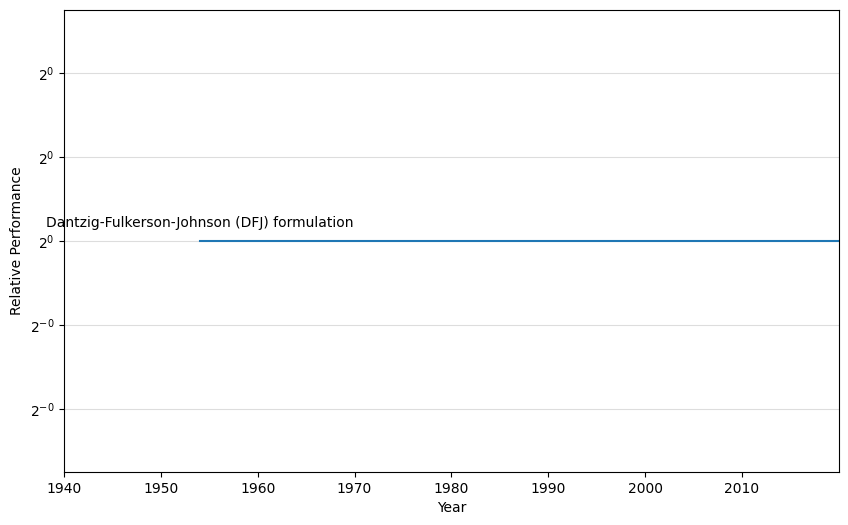

In [934]:

# Plotting the relative performance improvements
plt.figure(figsize=(10, 6))
plt.step(APSP_exact_filtered['Year'], APSP_exact_filtered['Relative Improvement'], where='post',)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Relative Performance')

plt.xlim(1940, 2020)
plt.xticks(np.arange(1940, 2020, 10))


# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$2^{{{val:.0f}}}$'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))


# ygrid lines
plt.grid(True, which='major', axis='y', linestyle='-', color='#DDD')


# Annotate the points with the algorithm names
for i, row in APSP_exact_filtered.iterrows():
    if i == len(APSP_exact_filtered) - 1:
        continue
    

    plt.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_22347/3052942565.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  exact_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_22347/3052942565.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

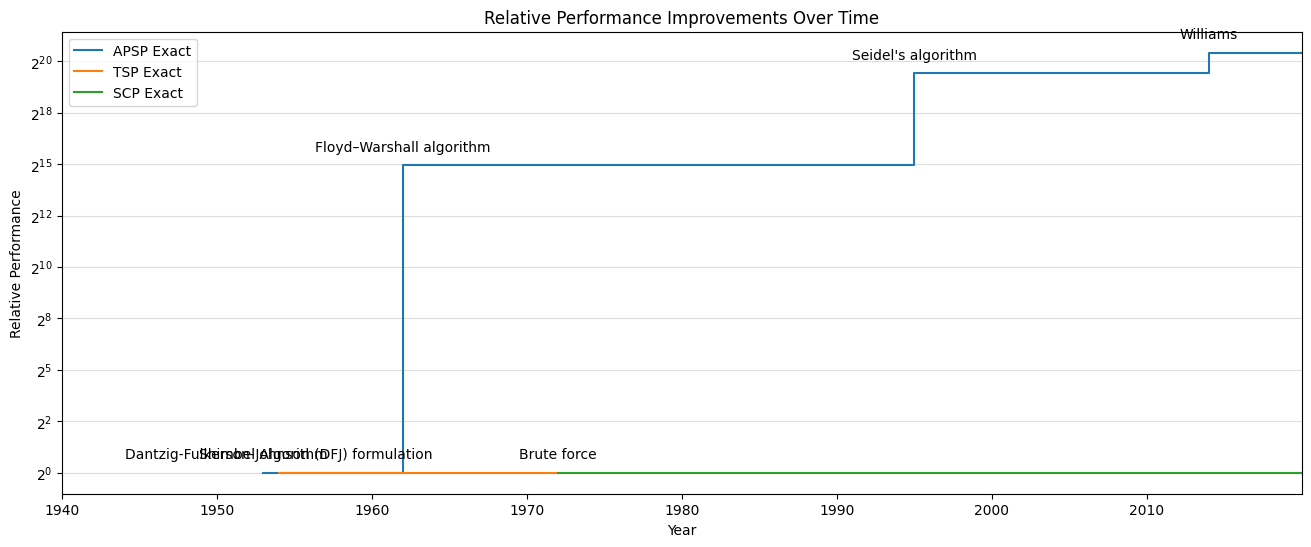

In [935]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from complexity_functions.huge_num import log

# Function to filter lowest values for each family
def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] < last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    df = pd.DataFrame(filtered_rows)
    df.reset_index(drop=True, inplace=True)
    return df

def process_family_data(family_name, exact_df, approx_df):
    exact_data = exact_df[exact_df['Family Name'] == family_name]
    constant_factor_data = approx_df[approx_df['Family Name'] == family_name]
    any_error_data = approx_df[approx_df['Family Name'] == family_name]

    # Filter constant factor with correct conditions
    constant_factor_data = constant_factor_data[
        (constant_factor_data['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
        (constant_factor_data['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
    ]

    # Keep only specified columns
    columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
    exact_data = exact_data[columns_to_keep]
    constant_factor_data = constant_factor_data[columns_to_keep]
    any_error_data = any_error_data[columns_to_keep]

    # Concatenate exact into constant factor and any error
    constant_factor_data = pd.concat([constant_factor_data, exact_data], ignore_index=True)
    any_error_data = pd.concat([any_error_data, exact_data], ignore_index=True)

    # Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
    exact_filtered = filter_lowest_values(exact_data)
    constant_factor_filtered = filter_lowest_values(constant_factor_data)
    any_error_filtered = filter_lowest_values(any_error_data)

    # Calculate relative performance improvements
    first_value = exact_filtered['n = 10^9'].iloc[0]
    exact_filtered['Relative Improvement'] = [first_value / x for x in exact_filtered['n = 10^9']]
    constant_factor_filtered['Relative Improvement'] = [first_value / x for x in constant_factor_filtered['n = 10^9']]
    any_error_filtered['Relative Improvement'] = [first_value / x for x in any_error_filtered['n = 10^9']]

    # Replace NaN or inf values with a small number before applying log2
    exact_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    constant_factor_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    any_error_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaNs with a small positive number to avoid log issues
    exact_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    constant_factor_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    any_error_filtered['Relative Improvement'].fillna(1e-10, inplace=True)

    # Log scale
    exact_filtered['Relative Improvement'] = [log(x, 2) for x in exact_filtered['Relative Improvement']]
    constant_factor_filtered['Relative Improvement'] = [log(x, 2) for x in constant_factor_filtered['Relative Improvement']]
    any_error_filtered['Relative Improvement'] = [log(x, 2) for x in any_error_filtered['Relative Improvement']]


    # copy last row of each family to the end of the dataframe
    last_row = exact_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    exact_filtered = pd.concat([exact_filtered, last_row], ignore_index=True)

    last_row = constant_factor_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    constant_factor_filtered = pd.concat([constant_factor_filtered, last_row], ignore_index=True)

    last_row = any_error_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    any_error_filtered = pd.concat([any_error_filtered, last_row], ignore_index=True)

    return exact_filtered, constant_factor_filtered, any_error_filtered

# Process data for each family
APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered = process_family_data(
    'All-Pairs Shortest Paths (APSP)', sheet1, approximation_algorithms)
TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered = process_family_data(
    'The Traveling-Salesman Problem', sheet1, approximation_algorithms)
SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered = process_family_data(
    'The Set-Covering Problem', sheet1, approximation_algorithms)
TSP_exact_filtered
# Plotting the relative performance improvements
plt.figure(figsize=(16, 6))

def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix):
    plt.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Exact')
    # plt.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', linestyle='--', label=f'{label_prefix} Constant Factor')
    # plt.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', linestyle=':', label=f'{label_prefix} Any Error')

    for i, row in exact_filtered.iterrows():
        if i == len(exact_filtered) - 1:
            continue
        
        plt.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center')

plot_family_data(APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered, 'APSP')
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP')
plot_family_data(SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered, 'SCP')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Relative Performance')
plt.title('Relative Performance Improvements Over Time')
plt.xlim(1940, 2020)
plt.xticks(np.arange(1940, 2020, 10))
plt.legend()

# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$2^{{{val:.0f}}}$'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))

# ygrid lines
plt.grid(True, which='major', axis='y', linestyle='-', color='#DDD')

# Show the plot
plt.show()


/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_22347/1534622177.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  exact_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/6k/rf2_mhpd7790drjk7smpzn2r0000gn/T/ipykernel_22347/1534622177.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate o

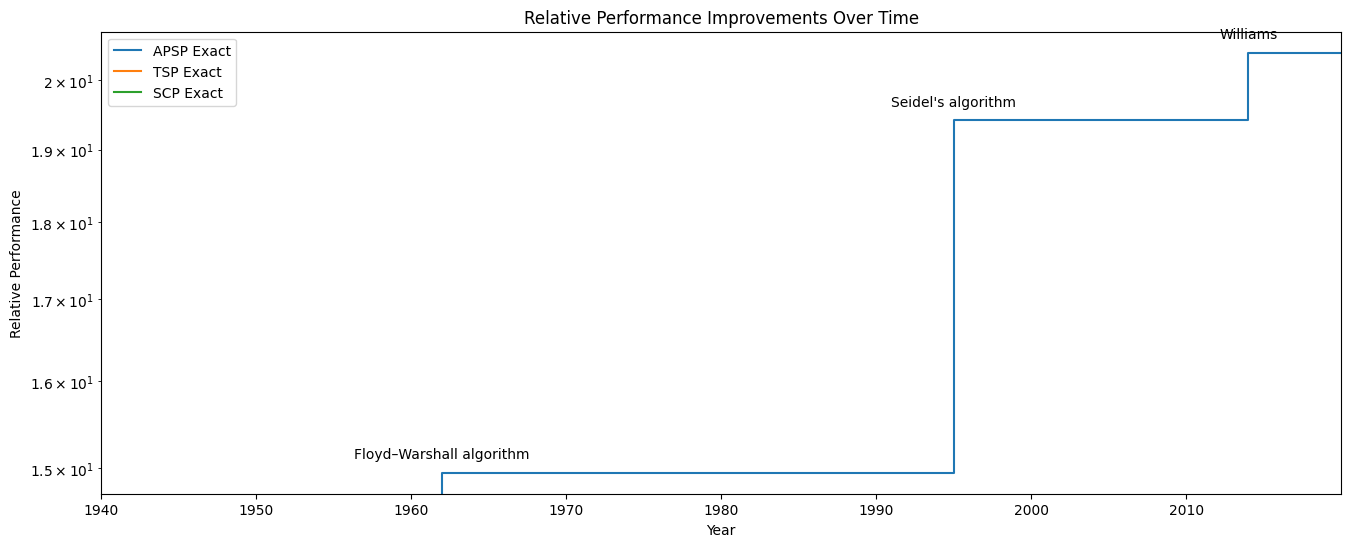

In [936]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from complexity_functions.huge_num import log

# Function to filter lowest values for each family
def filter_lowest_values(df):
    df.sort_values(by=['Year'], inplace=True)
    filtered_rows = []
    last_value = float('inf')
    
    for _, row in df.iterrows():
        if row['n = 10^9'] < last_value:
            filtered_rows.append(row)
            last_value = row['n = 10^9']
    
    df = pd.DataFrame(filtered_rows)
    df.reset_index(drop=True, inplace=True)
    return df

def process_family_data(family_name, exact_df, approx_df):
    exact_data = exact_df[exact_df['Family Name'] == family_name]
    constant_factor_data = approx_df[approx_df['Family Name'] == family_name]
    any_error_data = approx_df[approx_df['Family Name'] == family_name]

    # Filter constant factor with correct conditions
    constant_factor_data = constant_factor_data[
        (constant_factor_data['Approximation Factor Class (Mult)'].fillna(float('inf')) <= 4.5) |
        (constant_factor_data['Approximation Factor Class (Add)'].fillna(float('inf')) <= 2)
    ]

    # Keep only specified columns
    columns_to_keep = ['Family Name', 'Algorithm Name', 'Year', 'n = 10^9']
    exact_data = exact_data[columns_to_keep]
    constant_factor_data = constant_factor_data[columns_to_keep]
    any_error_data = any_error_data[columns_to_keep]

    # Concatenate exact into constant factor and any error
    constant_factor_data = pd.concat([constant_factor_data, exact_data], ignore_index=True)
    any_error_data = pd.concat([any_error_data, exact_data], ignore_index=True)

    # Filter each DataFrame to keep only the lowest values for n = 10^9 until each year
    exact_filtered = filter_lowest_values(exact_data)
    constant_factor_filtered = filter_lowest_values(constant_factor_data)
    any_error_filtered = filter_lowest_values(any_error_data)

    # Calculate relative performance improvements
    first_value = exact_filtered['n = 10^9'].iloc[0]
    exact_filtered['Relative Improvement'] = [first_value / x for x in exact_filtered['n = 10^9']]
    constant_factor_filtered['Relative Improvement'] = [first_value / x for x in constant_factor_filtered['n = 10^9']]
    any_error_filtered['Relative Improvement'] = [first_value / x for x in any_error_filtered['n = 10^9']]

    # Replace NaN or inf values with a small number before applying log2
    exact_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    constant_factor_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)
    any_error_filtered['Relative Improvement'].replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaNs with a small positive number to avoid log issues
    exact_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    constant_factor_filtered['Relative Improvement'].fillna(1e-10, inplace=True)
    any_error_filtered['Relative Improvement'].fillna(1e-10, inplace=True)

    # Log scale
    exact_filtered['Relative Improvement'] = [log(x, 2) for x in exact_filtered['Relative Improvement']]
    constant_factor_filtered['Relative Improvement'] = [log(x, 2) for x in constant_factor_filtered['Relative Improvement']]
    any_error_filtered['Relative Improvement'] = [log(x, 2) for x in any_error_filtered['Relative Improvement']]


    # copy last row of each family to the end of the dataframe
    last_row = exact_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    exact_filtered = pd.concat([exact_filtered, last_row], ignore_index=True)

    last_row = constant_factor_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    constant_factor_filtered = pd.concat([constant_factor_filtered, last_row], ignore_index=True)

    last_row = any_error_filtered.iloc[-1:].copy()
    last_row.loc[last_row.index, 'Year'] = 2024
    any_error_filtered = pd.concat([any_error_filtered, last_row], ignore_index=True)

    return exact_filtered, constant_factor_filtered, any_error_filtered

# Process data for each family
APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered = process_family_data(
    'All-Pairs Shortest Paths (APSP)', sheet1, approximation_algorithms)
TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered = process_family_data(
    'The Traveling-Salesman Problem', sheet1, approximation_algorithms)
SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered = process_family_data(
    'The Set-Covering Problem', sheet1, approximation_algorithms)
TSP_exact_filtered
# Plotting the relative performance improvements
plt.figure(figsize=(16, 6))

def plot_family_data(exact_filtered, constant_factor_filtered, any_error_filtered, label_prefix):
    plt.step(exact_filtered['Year'], exact_filtered['Relative Improvement'], where='post', label=f'{label_prefix} Exact')
    # plt.step(constant_factor_filtered['Year'], constant_factor_filtered['Relative Improvement'], where='post', linestyle='--', label=f'{label_prefix} Constant Factor')
    # plt.step(any_error_filtered['Year'], any_error_filtered['Relative Improvement'], where='post', linestyle=':', label=f'{label_prefix} Any Error')

    for i, row in exact_filtered.iterrows():
        if i == len(exact_filtered) - 1:
            continue
        
        plt.annotate(row['Algorithm Name'], (row['Year'], row['Relative Improvement']), textcoords="offset points", xytext=(0,10), ha='center')

plot_family_data(APSP_exact_filtered, APSP_constant_factor_filtered, APSP_any_error_filtered, 'APSP')
plot_family_data(TSP_exact_filtered, TSP_constant_factor_filtered, TSP_any_error_filtered, 'TSP')
plot_family_data(SCP_exact_filtered, SCP_constant_factor_filtered, SCP_any_error_filtered, 'SCP')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Relative Performance')
plt.title('Relative Performance Improvements Over Time')
plt.xlim(1940, 2020)
plt.xticks(np.arange(1940, 2020, 10))
plt.yscale('log')
plt.legend()

# Custom formatter for the y-axis
def y_format(val, pos):
    return f'$2^{{{val:.0f}}}$'

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(y_format))

# ygrid lines
plt.grid(True, which='major', axis='y', linestyle='-', color='#DDD')

# Show the plot
plt.show()
